In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import json
import os
from tqdm import tqdm
from collections import Counter
import numpy as np
import csv

In [2]:
MAIN_PATH = "/home/jack/datasets/polish_rap/"
RAPPERS_PATH = "/home/jack/datasets/polish_rap/stm_lyrics/"
DICTIONARY_PATH = "/home/jack/datasets/polish_dictionaries/slownik_znormalizowany.json"

VERSES_MAX = 18000

In [3]:
def get_strong_words():
    with open(MAIN_PATH + "strong_language_lem.json", "r") as f:
        return json.load(f)

In [313]:
strongs = set(get_strong_words())

In [314]:
len(strongs)

304

In [315]:
def get_all_strongs():
    rappers_strongs = {}
    strongs_count = Counter()
    rappers = os.listdir(RAPPERS_PATH)
    for rapper in rappers:
        songs = os.listdir(RAPPERS_PATH + rapper)
        num_songs = len(songs)
        num_strongs = 0
        for song in songs:
            with open(RAPPERS_PATH + rapper + "/" + song, "r") as f:
                song_text = json.load(f)
            song_words = song_text["lyrics"].split()
            strongs_in_song = list(filter(lambda x: x in strongs, song_words))
            num_strongs += len(strongs_in_song)
            strongs_count += Counter(strongs_in_song)
        rappers_strongs[rapper] = num_strongs/num_songs
    return rappers_strongs, strongs_count

In [316]:
all_rapers_strongs, strongs_count = get_all_strongs()

In [317]:
rappers_df = pd.DataFrame.from_dict(all_rapers_strongs, "index")
rappers_df.sort_values(by=0, inplace=True, ascending=False)

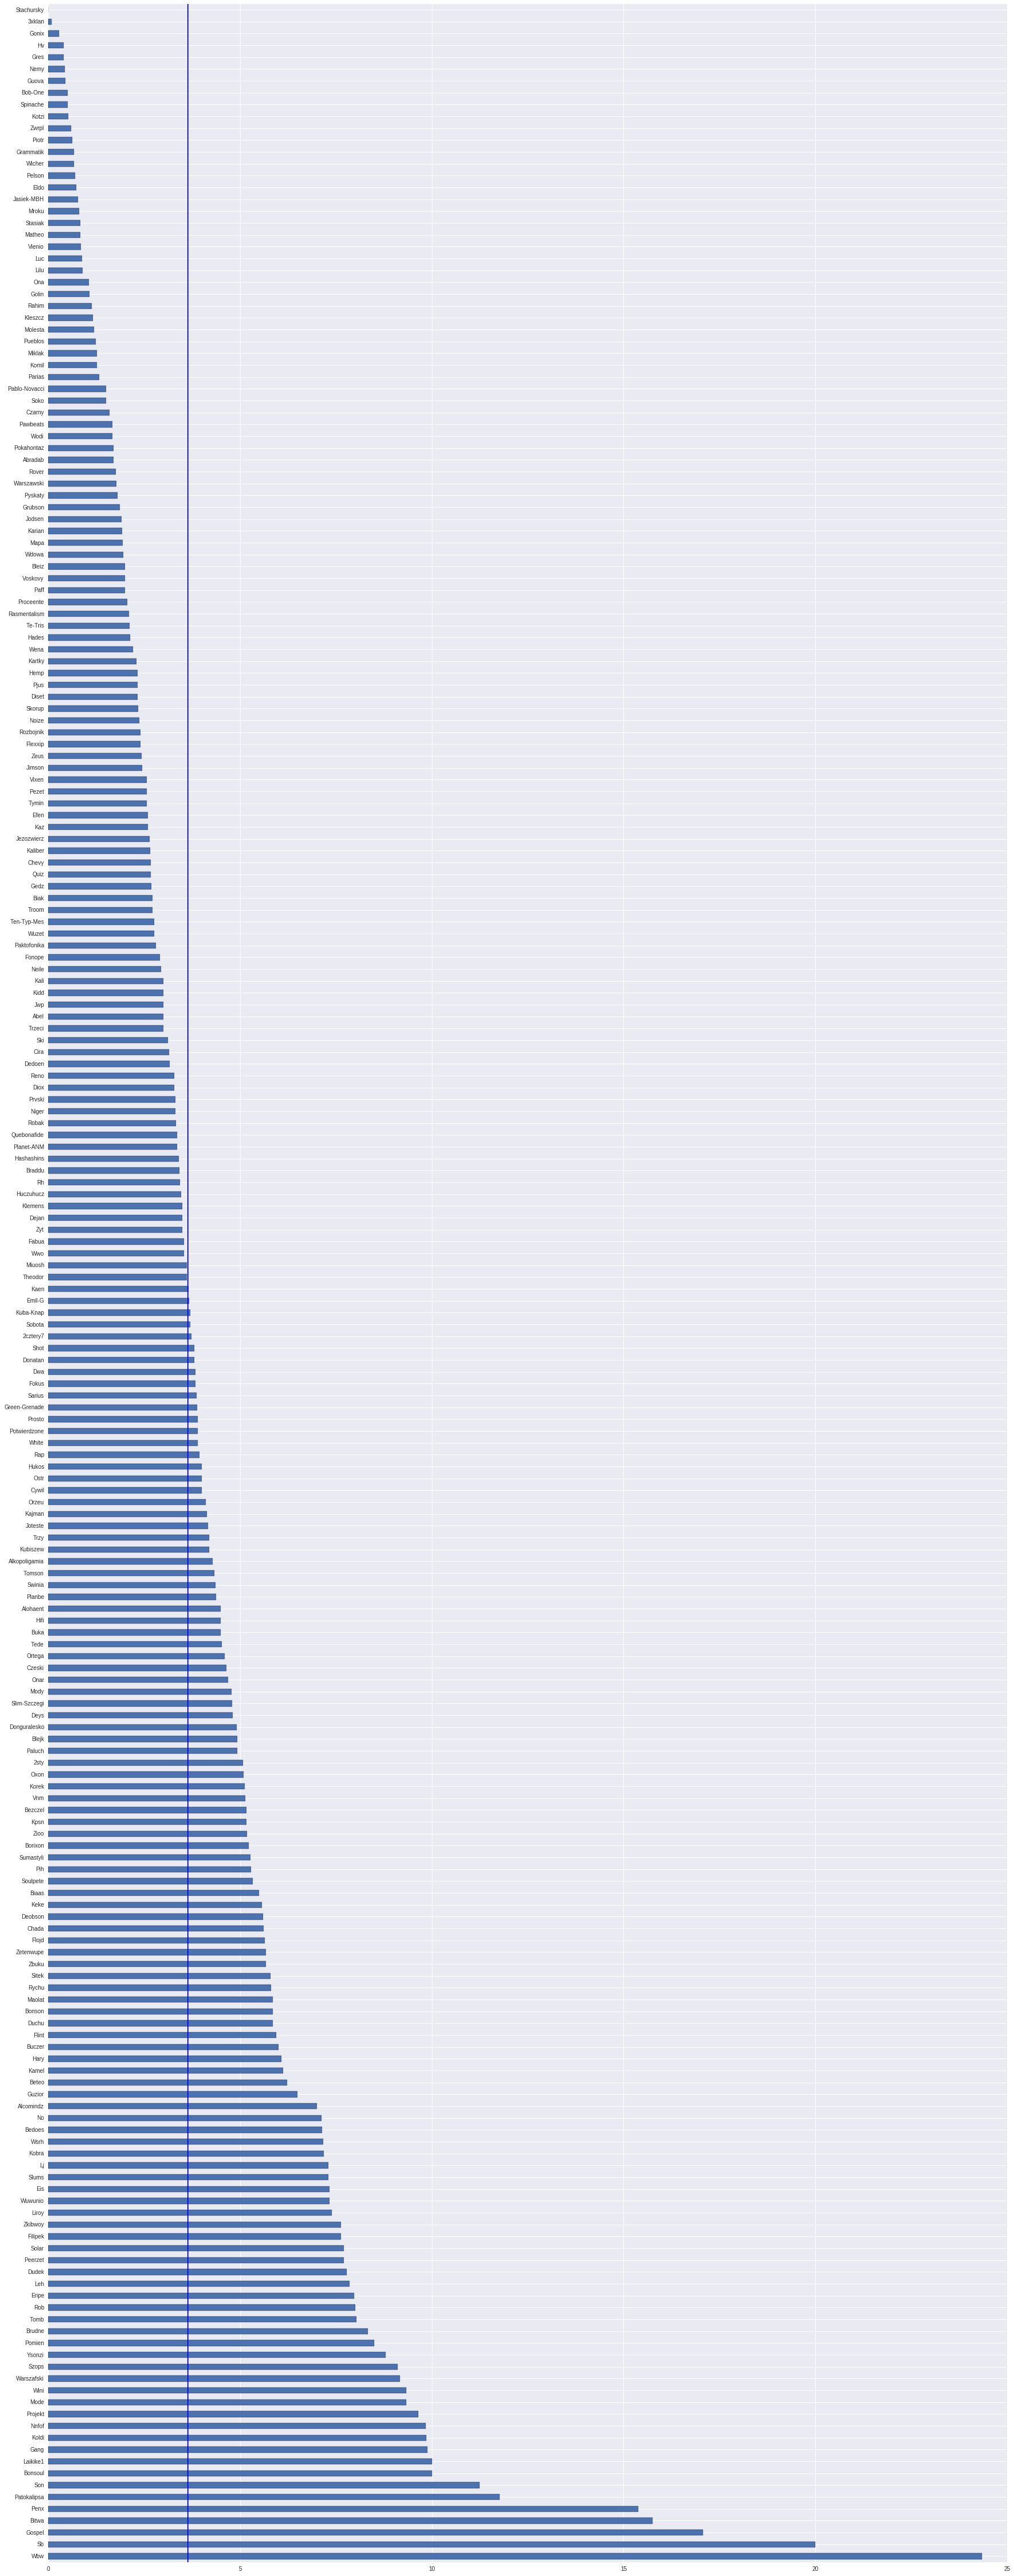

In [318]:
plt.figure()
rappers_df[0].plot(kind="barh", figsize=(30, 80))
plt.axvline(x=float(rappers_df.median(0)))
# strongs_df["median"].plot(kind="line", ax = ax)

In [319]:
print(rappers_df.median(0))

0    3.636054
dtype: float64


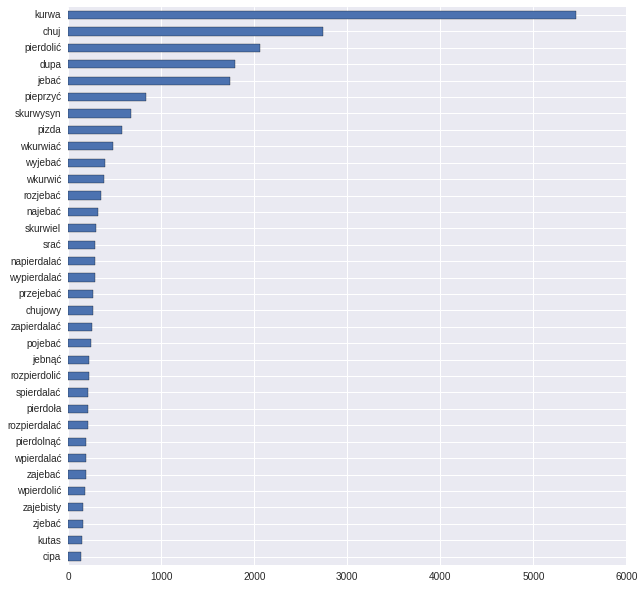

In [320]:
strongs_df = pd.Series(dict(strongs_count))
strongs_df[strongs_df > 100].sort_values().plot(kind="barh", figsize=(10,10))

In [321]:
strongs_df[strongs_df > 100].sort_values()

cipa             134
kutas            142
zjebać           153
zajebisty        155
wpierdolić       174
zajebać          188
wpierdalać       188
pierdolnąć       190
rozpierdalać     208
pierdoła         213
spierdalać       216
rozpierdolić     221
jebnąć           222
pojebać          246
zapierdalać      251
chujowy          265
przejebać        269
wypierdalać      286
napierdalać      289
srać             292
skurwiel         294
najebać          318
rozjebać         350
wkurwić          381
wyjebać          394
wkurwiać         480
pizda            579
skurwysyn        677
pieprzyć         838
jebać           1742
dupa            1792
pierdolić       2057
chuj            2739
kurwa           5456
dtype: int64

In [4]:
def build_dict():
    with open(DICTIONARY_PATH, "r") as f:
        return json.load(f)
slownik_pl_dict = build_dict()

In [5]:
def ok_word(word):
    return word in slownik_pl_dict

In [6]:
all_vocab = Counter()
rappers = os.listdir(RAPPERS_PATH)
for rapper in tqdm(rappers):
    songs = os.listdir(RAPPERS_PATH + rapper)
    for song in songs:
        with open(RAPPERS_PATH + rapper + "/" + song, "r") as f:
            song_text = json.load(f)
        song_words = song_text["lyrics"].split()
        all_vocab += Counter(song_words)

In [391]:
len(set(all_vocab))

63367

In [392]:
all_ok_vocab = set(filter(ok_word, all_vocab))
len(all_ok_vocab)

35019

In [7]:
def get_vocab():
    rappers_vocab = {}
    unique_words = {}
    rappers_len = {}
    rappers_nokwords = {}
    
    rappers = os.listdir(RAPPERS_PATH)
    
    for rapper in tqdm(rappers):
        rapper_vocab = Counter()
        rapper_nokwords = set()
        songs = os.listdir(RAPPERS_PATH + rapper)
        num_songs = len(songs)
        rapper_len = 0
        for song in songs:
            if rapper_len <= VERSES_MAX:
                with open(RAPPERS_PATH + rapper + "/" + song, "r") as f:
                    song_text = json.load(f)
                song_words = song_text["lyrics"].split()[:(VERSES_MAX - rapper_len)]
                #filter out every non-existent word
                song_words_ok = filter(ok_word, song_words)
                rapper_nokwords |= set(filter(lambda x: not ok_word(x), song_words))
                rapper_vocab += Counter(song_words_ok)
                rapper_len += len(song_words) #maybe it should be better to include just song_words_ok
                other_words = set(all_vocab - rapper_vocab)
        unique_words[rapper] = set(rapper_vocab) - other_words
        rappers_vocab[rapper] = set(rapper_vocab)
        rappers_len[rapper] = rapper_len
        rappers_nokwords[rapper] = rapper_nokwords
#         print(rapper, " Unq:", len(unique_words[rapper]), "ALL", rapper_len, "Nok", 
#               len(rapper_nokwords), "Wds", len(rappers_vocab[rapper]))
    return rappers_vocab, unique_words, rappers_len, rappers_nokwords

In [8]:
rappers_vocab, unique_words, rappers_allwords, rappers_nokwords = get_vocab()

In [10]:
%%time

vocab_df = pd.Series(rappers_vocab).to_frame("vocab")
unique_df = pd.Series(unique_words).to_frame("unique")
allwords_df = pd.Series(rappers_allwords).to_frame("allwords")
nokwords_df = pd.Series(rappers_nokwords).to_frame("nokwords")


frames = [vocab_df, unique_df, allwords_df, nokwords_df]
rap_df = pd.concat(frames, axis=1)

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 48.5 ms


In [11]:
rappers_allwords

{'2cztery7': 6978,
 '2sty': 12673,
 '3xklan': 3776,
 'Abel': 2261,
 'Abradab': 18000,
 'Alcomindz': 1277,
 'Alkopoligamia': 2891,
 'Alohaent': 2423,
 'Bedoes': 2002,
 'Beteo': 2715,
 'Bezczel': 18000,
 'Biaas': 18000,
 'Biak': 2093,
 'Bitwa': 5257,
 'Bleiz': 2863,
 'Blejk': 3671,
 'Bob-One': 4640,
 'Bonson': 18000,
 'Bonsoul': 3566,
 'Borixon': 17002,
 'Braddu': 8988,
 'Brudne': 2866,
 'Buczer': 2482,
 'Buka': 18000,
 'Chada': 17313,
 'Chevy': 1313,
 'Cira': 2771,
 'Cywil': 2256,
 'Czarny': 3027,
 'Czeski': 4582,
 'Dedoen': 2011,
 'Dejan': 7802,
 'Deobson': 2857,
 'Deys': 18000,
 'Diox': 9061,
 'Diset': 11775,
 'Donatan': 3701,
 'Donguralesko': 5341,
 'Duchu': 3412,
 'Dudek': 4258,
 'Dwa': 4320,
 'Efen': 1851,
 'Eis': 2192,
 'Eldo': 18000,
 'Emil-G': 4309,
 'Eripe': 18000,
 'Fabua': 7148,
 'Filipek': 18000,
 'Flexxip': 2249,
 'Flint': 14209,
 'Flojd': 7023,
 'Fokus': 12001,
 'Fonope': 7665,
 'Gang': 5869,
 'Gedz': 10517,
 'Golin': 8206,
 'Gonix': 2090,
 'Gospel': 6031,
 'Grammatik': 53

In [12]:
rap_df.head()

,vocab,unique,allwords,nokwords
2cztery7,"{obroża, wymyślać, słuch, kwadrat, przyjechać,...","{otto, normować, krysia, kirus, zagłoba, liber...",6978,"{247, public, korga, kelis, ipod, ożeż, trebli..."
2sty,"{kumaty, magellan, prędkość, kwadrat, słuch, o...","{rondela, obiadać, trypolis, podób, melasa, pr...",12673,"{beverly, gold”, blingów, hipi, teteraz, bro, ..."
3xklan,"{prędkość, kwadrat, słuch, odległość, oświecić...","{pigmalion, cichutko, dźwięcznie, zasobnik, di...",3776,"{x, xloga, planatora, rymologiem, zimnaaa, too..."
Abel,"{termos, mops, fajny, mowa, odległość, słyszeć...","{cbos, syllabus, gross, ściemniały, naszyć, wi...",2261,"{ziemia…, wcześniej…, wuwua, sarmancko, cd’ki,..."
Abradab,"{kumaty, prędkość, minimum, słuch, trok, soczy...","{służka, niepochlebny, grzeszek, jednoczący, c...",18000,"{quta, tabaluga, sorry, dzikołaj, klepopatra, ..."


In [13]:
rap_df["vocab_size"] = rap_df["vocab"].map(len)
rap_df["unique_size"] = rap_df["unique"].map(len)
rap_df["nokwords_size"] = rap_df["nokwords"].map(len)
rap_df["eloquency"] = rap_df["vocab_size"] / rap_df["allwords"]


In [14]:
popular_rappers = rap_df[rap_df["allwords"] > VERSES_MAX - 1]

In [15]:
len(popular_rappers)

31

In [17]:
popular_rappers.sort_values(by="vocab_size", ascending=False)

,vocab,unique,allwords,nokwords,vocab_size,unique_size,nokwords_size,eloquency
Ten-Typ-Mes,"{pewnik, kumaty, zbudować, wypisać, prędkość, ...","{panierować, adiunkt, obkleić, strząsnąć, skoł...",18000,"{muki, eight, psychosadysta, acid, tea, sexi, ...",4293,140,564,0.238500
Mickiewicz,"{obroża, wypisać, gerwazy, bór, kotny, słuch, ...","{zsiadać, harbajtel, kotny, roratny, rogaty, z...",18000,"{»mianuję, «miałożby, vobiscum, nabadał, «mopa...",4235,413,355,0.235278
Buka,"{dowalić, kumaty, zbudować, prędkość, kwadrat,...","{trasować, wigwam, bawół, fajer, pomiara, wypi...",18000,"{300, ścieme, mezadrol, l’arte, zatracic, nasp...",3873,81,615,0.215167
Abradab,"{kumaty, prędkość, minimum, słuch, trok, soczy...","{służka, niepochlebny, grzeszek, jednoczący, c...",18000,"{quta, tabaluga, sorry, dzikołaj, klepopatra, ...",3842,132,371,0.213444
Slums,"{kumaty, kwadrat, śląsk, berlin, przyjechać, z...","{prześmieszny, jaworzno, zielonogórski, mroczn...",18000,"{gone, blocks, hejtujesz, ofra, supposed, stan...",3822,89,491,0.212333
Deys,"{wypisać, prędkość, stress, porta, kwadrat, mi...","{chamówa, cameron, lizergowy, korelować, heral...",18000,"{zczaił, pikseloza, skfr, jacket, halfpipe, im...",3818,124,669,0.212111
Te-Tris,"{szczury, porta, tatra, odpływać, doznanie, ko...","{steciuk, cesarka, trynidad, obgryzać, mumia, ...",18000,"{sexi, o’connor, common, mixtapeom, hewlett, g...",3784,95,512,0.210222
Paluch,"{zbudować, prędkość, zaprawić, słuch, odpływać...","{wielofunkcyjny, siekierka, międzyosiedlowy, t...",18000,"{vlogy, kmince, brendoch, 300, diil, eyes, cen...",3677,65,389,0.204278
Kuba-Knap,"{zbudować, pewno, minimum, kwadrat, tatra, szp...","{przytępiać, bystra, dżentelmeńsko, karina, dy...",18000,"{fullcapach, świat”, gando, mielon, braka, hub...",3664,107,527,0.203556
Quebonafide,"{kadencja, zbudować, wypisać, pewno, stress, s...","{powypalać, matrymonialność, wektor, dualizm, ...",18000,"{konstantynopolitańczykowianeczka, room, pezet...",3632,123,741,0.201778


In [18]:
rap_df[rap_df.index == "Hashashins"]

,vocab,unique,allwords,nokwords,vocab_size,unique_size,nokwords_size,eloquency
Hashashins,"{kumaty, kwasy, kwadrat, słuch, pomarańcza, cz...","{turing, demonologia, imersja, synod, egzegeza...",3896,"{possumus, kerbale, flavour, theysiusza, 1000,...",1428,51,156,0.36653


In [349]:
vocab_df.sort_values(by="vocab_size", ascending=False)

,vocab,unique,allwords_size,nokwords,vocab_size,unique_size,nokwords_size,eloquency
Tede,"{komórki, iskra, przemknąć, samarka, potęga, p...","{prekognicja, basketball, odnawialny, elektrom...",8702,"{kweli, buchy, mariotu, x8, hd, flow, pogina, ...",9104,40,152,1.046196
Slums,"{iskra, komórki, pipa, dyndać, omawiać, potęga...","{marcela, ciechocinek, proust, sofizmat}",1942,"{betty, apap, x8, trzęść, leejdis, zdzwonka, l...",8884,4,33,4.574665
Ten-Typ-Mes,"{iskra, komórki, potęga, koniecznie, zegarek, ...","{gniewnie, angielka, jagodowy, rozgoń, nimb, z...",2090,"{π, kiteach, yeah, szmulkarewelka, thats, visi...",7603,23,106,3.637799
Te-Tris,"{iskra, komórki, domowego, koniecznie, wstępny...",{późnonocny},3539,"{vibe, beef, ije, fejmu, flow, ex, kminią, żeb...",6100,1,65,1.723651
Paluch,"{iskra, komórki, pipa, potęga, prostak, wyjści...","{mgławica, astralnie, równoważyć, gwałtowny, k...",25494,"{trankilla, hd, kilkanacie, hawku, rps, nonsto...",5516,68,428,0.216365
Eldo,"{iskra, uśmiech, mapa, pędzić, wylać, prostak,...","{paskowy, bezdzietność, trzykrotny, antysemita...",5452,"{miuosh, rasmentalism, qćka, 2x, still, dżanaz...",5240,18,104,0.961115
Buka,"{opuścić, iskra, pipa, kuracja, uśmiech, mapa,...","{altanka, popytać, plunąć, nabytek, przydrepta...",30720,"{around, dzien, hd, lizusowie, of, nonstop, ti...",5068,87,725,0.164974
Peerzet,"{komórki, opuścić, obłudny, niedowiarek, przem...","{kopalniany, tao, elektroda, zębaty, odłam, zb...",17144,"{tchibo, planking, pazłotko, pogrzebując, stil...",4849,90,338,0.282839
Eripe,"{komórki, niedowiarek, pasmo, opuścić, zaatako...","{pobojowisko, rozporządzenie, pax, kulisz, wie...",4640,"{cba, alli, hd, 8, flow, of, kachej, 100, lsf,...",4840,6,61,1.043103
Ona,"{iskra, szklarz, pasmo, pipa, zaatakować, opuś...","{wariometr, brahma, churchill, metalik, flegma...",1313,"{prvskim, alkopolis, 8, di, tróji, nakurwiam, ...",4616,7,110,3.515613


In [19]:
popular_rappers.to_csv(MAIN_PATH + "popular_rappers.csv", sep="\t", encoding="utf-8")

In [24]:
if not os.path.exists(MAIN_PATH + "d2v_config/"):
    os.mkdir(MAIN_PATH + "d2v_config/")
popular_rappers.to_json("/home/jack/datasets/polish_rap/d2v_config/popular_rappers.json")